In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [4]:
bc = pd.read_csv('./Data/BTC-USD.csv')

In [5]:
# Ajout d'un nom pour la col 'date' et Convertion en datetime

bc.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

bc['Date'] = pd.to_datetime(bc.Date)

In [6]:
# Setting the index as the dates and print shape
bc.set_index(bc['Date'], inplace=True)

print(bc)

Date          open          high           low         close  \
Date                                                                            
2014-09-16 2014-09-16    465.864014    468.174011    452.421997    457.334015   
2014-09-17 2014-09-17    456.859985    456.859985    413.104004    424.440002   
2014-09-18 2014-09-18    424.102997    427.834991    384.532013    394.795990   
2014-09-19 2014-09-19    394.673004    423.295990    389.882996    408.903992   
2014-09-20 2014-09-20    408.084991    412.425995    393.181000    398.821014   
...               ...           ...           ...           ...           ...   
2020-07-26 2020-07-26   9905.217773  11298.221680   9903.969727  10990.873047   
2020-07-27 2020-07-27  11017.463867  11204.327148  10632.631836  10912.823242   
2020-07-28 2020-07-28  10912.953125  11304.397461  10856.141602  11100.467773   
2020-07-29 2020-07-29  11099.833008  11169.356445  10895.455078  11111.213867   
2020-07-31 2020-07-31  11116.235352  11400.32

In [8]:
# Selecting only the dates from 2017-01-01 onwards when Bitcoin popularity increased.
bc = bc[['close']].loc['2017-01-01':]

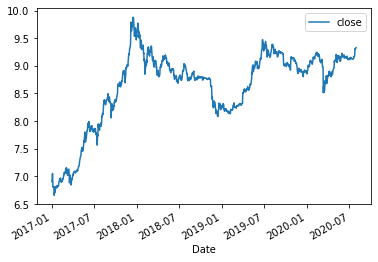

In [14]:
# Converting the data to a logarithmic scale
bc_log = pd.DataFrame(np.log(bc.close))

bc_log.plot()

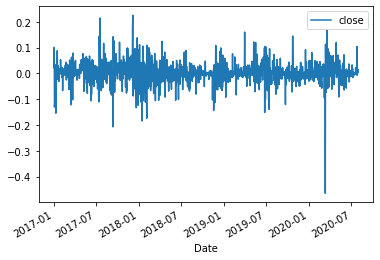

In [23]:
# Differencing the log values
log_diff = bc_log.diff().dropna()
log_diff.plot()

In [25]:
# Using the Dickey-Fuller test to check for stationarity
results = adfuller(log_diff.close)
print(f"P-value: {results[1]}")

P-value: 0.0


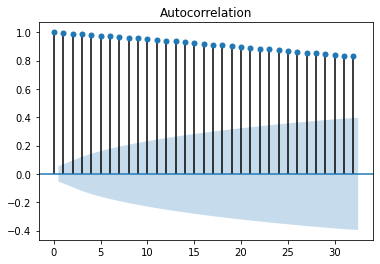

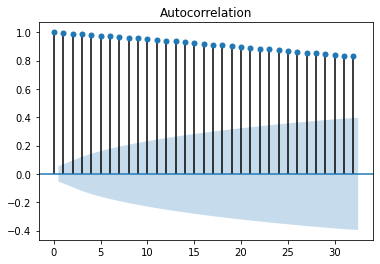

In [28]:
#ACF (Auto Correlation Function)
plot_acf(bc)

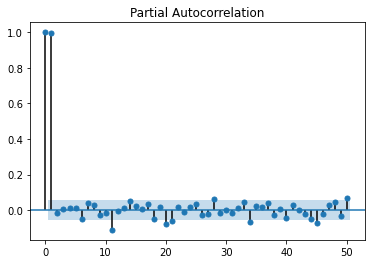

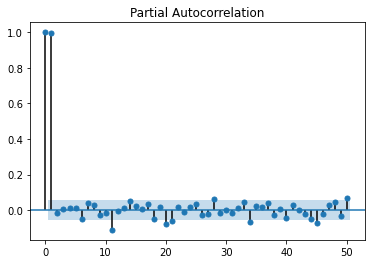

In [31]:
#PACF (Partial Autocorrelation Function)
plot_pacf(bc, lags=50)
